# Para iniciarmos o código, vamos importar as bibliotecas necessárias para que construamos a nossa CNN (Convolutional Neural Network)

Nesta célula, importamos as bibliotecas necessárias, definimos as seeds do TensorFlow e do NumPy para reprodutibilidade e configuramos o nível de logs do TensorFlow.


In [20]:
import os
import zipfile
import kagglehub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Configurar seeds para reprodutibilidade
tf.random.set_seed(42)
np.random.seed(42)

# Suprimir mensagens de log excessivas do TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Download e Extração do Dataset
Esta célula baixa o dataset "Fruit and Vegetable Image Recognition" do Kaggle usando a biblioteca kagglehub.  
Se o dataset for um arquivo ZIP, ele será extraído para um diretório local.

In [21]:
dataset_path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")
print("Caminho do arquivo do dataset:", dataset_path)

# Verificar se o arquivo baixado é um ZIP e extrair
if dataset_path.endswith('.zip'):
    extracted_path = "./dataset"  # Altere este diretório se desejar
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
    print("Dataset extraído para:", extracted_path)
else:
    extracted_path = dataset_path

Caminho do arquivo do dataset: C:\Users\Marcelo\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8


Agora vamos listar as pastas do diretório, monstrando também quais os tipos de frutas e vegetais que possuímos no dataset 
Estou fazendo isso pra clarificar, durante a implementação, o tipo de dados com que estou mexendo...

In [22]:
# List the top-level directories in the extracted dataset folder
print("Contents of the extracted dataset folder:")
print(os.listdir(extracted_path))
# Expected output should include: ['test', 'train', 'validation']

# List the contents of the 'train' directory to see the class folders
train_path = os.path.join(extracted_path, "train")
print("Contents of train directory:")
print(os.listdir(train_path))


Contents of the extracted dataset folder:
['test', 'train', 'validation']
Contents of train directory:
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


Nessa parte do código eu busquei entender qual o nome dos arquivos dentro de cada pasta, além de sinalizar se a imagem procurada foi encontrada.
Essa parte foi importante durante a implementação, porque me ajudou a esclarecer o modelo das imagens, o que facilitou bastante o tratamento delas.

In [23]:
# Construct the full image path using os.path.join.
# Adjust the folder names according to the dataset structure.
# For example, if we want to load an image from the "apple" class in the training set:
img_path = os.path.join(extracted_path, "train", "apple", "Image_1.jpg")
print("Full image path:", img_path)

# Check if the image file exists. If not, print the contents of the 'apple' folder.
if not os.path.exists(img_path):
    print("Image not found. Contents of the 'apple' folder:")
    apple_folder = os.path.join(extracted_path, "train", "apple")
    print(os.listdir(apple_folder))
else:
    print("Image found!")


Full image path: C:\Users\Marcelo\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\apple\Image_1.jpg
Image found!


# Primeira Visualização do Dataset
Nessa parte do código, criei a função de visualizar o dataset.
Primeiramente, escolhi qual o arquivo seria mostrado. Depois mostrei a imagem escolhida.

Contents of 'train/apple':
['Image_1.jpg', 'Image_10.jpg', 'Image_16.jpg', 'Image_17.jpg', 'Image_18.jpg', 'Image_19.jpg', 'Image_2.jpg', 'Image_20.jpg', 'Image_21.jpg', 'Image_23.jpg', 'Image_24.jpg', 'Image_25.jpg', 'Image_26.jpg', 'Image_27.jpg', 'Image_28.jpg', 'Image_3.jpg', 'Image_31.jpg', 'Image_32.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_35.png', 'Image_36.jpg', 'Image_37.jpg', 'Image_38.jpg', 'Image_39.jpg', 'Image_40.jpg', 'Image_41.jpg', 'Image_42.jpg', 'Image_43.jpg', 'Image_44.jpg', 'Image_45.jpg', 'Image_47.jpg', 'Image_48.jpg', 'Image_49.jpg', 'Image_5.JPG', 'Image_50.jpg', 'Image_51.jpg', 'Image_52.jpg', 'Image_53.png', 'Image_54.jpg', 'Image_55.jpg', 'Image_56.jpg', 'Image_57.jpg', 'Image_58.jpg', 'Image_59.png', 'Image_6.jpg', 'Image_60.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_63.jpg', 'Image_64.jpg', 'Image_65.png', 'Image_67.jpg', 'Image_68.jpg', 'Image_69.jpg', 'Image_7.jpg', 'Image_71.png', 'Image_76.png', 'Image_78.jpg', 'Image_80.jpg', 'Image_81.png', 'I

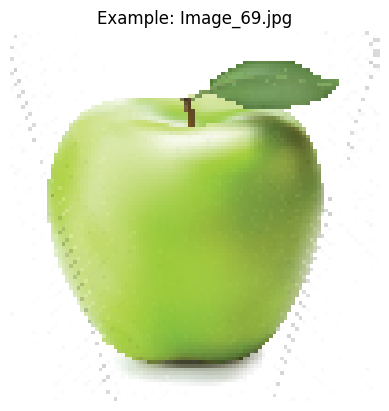

In [24]:
# Cell: List files in 'train/apple' and display an image

# Construct the path to the 'apple' folder in the training set
apple_folder = os.path.join(extracted_path, "train", "apple")
print("Contents of 'train/apple':")
files = os.listdir(apple_folder)
print(files)

# Check if there are any files and choose the first one as an example
if len(files) > 0:
    chosen_file = files[54] 
    img_path = os.path.join(apple_folder, chosen_file)
    print("Using image file:", chosen_file)
    
    # Load the image with a target size of 100x100 pixels
    img = load_img(img_path, target_size=(100, 100))
    img_array = img_to_array(img)
    
    # Display the image using matplotlib
    plt.imshow(img_array.astype('uint8'))
    plt.title(f"Example: {chosen_file}")
    plt.axis('off')
    plt.show()
else:
    print("No image files found in the 'train/apple' folder.")


# Visualização de Dados Randomicos
Nessa função, me atentei a mostrar diferentes tipos de imagens presentes no dataset.
Portanto, essa função retorna imagens "aleatórias" do dataset, mostrando a diversidade dos dados presentes.
Isso é de suma importância, porque nos ajuda a entender o tipo de dados que usamos.
Experimente rodar essa cell várias vezes...

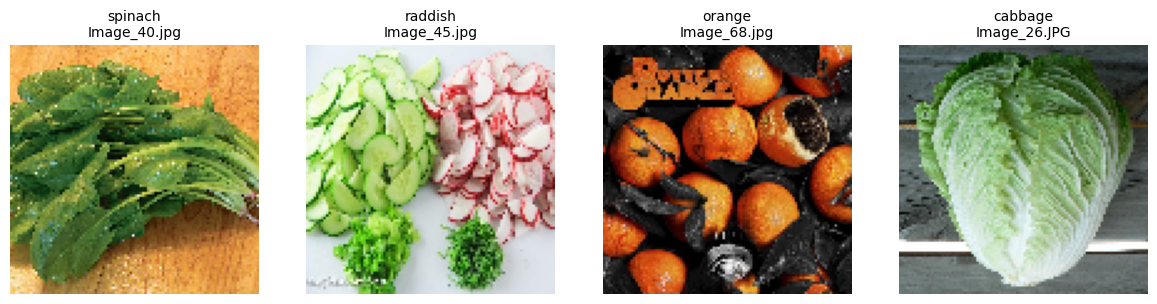

In [25]:
#This function returns 04 random fruits/vegetables from the dataset.
#The importance of it is to visualize the dataset and show how the data is.
import random

def show_random_fruits(parent_directory, num_images=4, target_size=(100, 100)):
    """
    Displays a specified number of random fruit images from any subfolder within the parent directory.
    
    Parameters:
    - parent_directory: The directory containing subfolders for each fruit class (e.g., 'train').
    - num_images: Number of random images to display.
    - target_size: Tuple representing the target image size (width, height) for resizing images.
    """
    # Get a list of all subdirectories (each representing a fruit class)
    subfolders = [os.path.join(parent_directory, d) 
                  for d in os.listdir(parent_directory) 
                  if os.path.isdir(os.path.join(parent_directory, d))]
    
    # Create a list to store all image paths along with their folder (class) names
    image_paths = []
    for folder in subfolders:
        files = os.listdir(folder)
        for file in files:
            full_path = os.path.join(folder, file)
            # Consider only common image file extensions
            if full_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append((folder, full_path))
    
    if len(image_paths) == 0:
        print("No image files found in any subdirectory of", parent_directory)
        return
    
    # Adjust the number of images if fewer are available
    if len(image_paths) < num_images:
        num_images = len(image_paths)
    
    # Randomly sample 'num_images' images from the list
    chosen_images = random.sample(image_paths, num_images)
    
    # Plot the selected images
    plt.figure(figsize=(num_images * 3, 3))
    for i, (folder, path) in enumerate(chosen_images):
        try:
            img = load_img(path, target_size=target_size)
            img_array = img_to_array(img)
        except Exception as e:
            print(f"Error loading {path}: {e}")
            continue
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img_array.astype('uint8'))
        # Use the folder name as the class label
        fruit_class = os.path.basename(folder)
        plt.title(f"{fruit_class}\n{os.path.basename(path)}", fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage: Assuming your extracted dataset has a 'train' folder
train_folder = os.path.join(extracted_path, "train")
show_random_fruits(train_folder, num_images=4, target_size=(100, 100))


# Criando a CNN (Convolutional Neural Network)

Importando Bibliotecas úteis

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2



# Aumento de Dados e Preparação dos Conjuntos
 
Nesta célula, configuramos o aumento de dados para o conjunto de treinamento usando ImageDataGenerator e preparamos os datasets de treinamento, validação e teste utilizando a função image_dataset_from_directory do TensorFlow.  
Os dados são normalizados (dividindo por 255) para que os valores dos pixels fiquem entre 0 e 1.


O Data Augmentation é uma técnica de pré-processamento de dados que cria versões modificadas das imagens originais do conjunto de treinamento. Ela é responsável por:
* Aumentar artificialmente o tamanho do dataset de treinamento
* Prevenir overfitting
* melhorar a generalização do modelo

Nesse código nós fazemos a Rotação, o Espelhamento, o Zoom, a Mudança de Briho, o Deslocamento e o Cisalhamento.

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

# Aumento de dados para o conjunto de treinamento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.3,
    shear_range=0.3,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

# Preparar conjunto de treinamento
train_dataset = image_dataset_from_directory(
    os.path.join(extracted_path, "train"), 
    labels='inferred',
    label_mode='categorical',  # Categórico, pois trabalhamos com 36 classes
    image_size=(100, 100),
    batch_size=32,
    shuffle=True
)

# Preparar conjunto de validação
validation_dataset = image_dataset_from_directory(
    os.path.join(extracted_path, "validation"),
    labels='inferred',
    label_mode='categorical',
    image_size=(100, 100),
    batch_size=32,
    shuffle=True
)

# Preparar conjunto de teste
test_dataset = image_dataset_from_directory(
    os.path.join(extracted_path, "test"),
    labels='inferred',
    label_mode='categorical',
    image_size=(100, 100),
    batch_size=32,
    shuffle=False  # Não é necessário embaralhar os dados de teste
)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


# Arquitetura do Modelo com Transfer Learning
Nesta célula, usamos o MobileNetV2 pré-treinado (no ImageNet) como base e congelamos suas camadas para que os pesos não sejam atualizados durante o treinamento.  
Em seguida, adicionamos uma camada de GlobalAveragePooling2D, camadas densas com normalização em lote (BatchNormalization) e dropout, finalizando com uma camada de saída softmax para classificar em 36 classes.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout

# Carregar o modelo MobileNetV2 pré-treinado sem a camada superior
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(100, 100, 3)
)
base_model.trainable = False  # Congelar a base

# Construir o classificador customizado
classifier = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduz os mapas de características para um único valor por mapa
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(36, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))  # 36 classes de saída
])

# Compilar o modelo com uma taxa de aprendizado baixa, pois estamos usando uma base pré-treinada
classifier.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.00005,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-08
    ),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Exibir a arquitetura do modelo
classifier.summary()

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_10852\1107959616.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,057,508 (11.66 MB)

 Trainable params: 797,988 (3.04 MB)

 Non-trainable params: 2,259,520 (8.62 MB)

#Ignorando erros no carregamento de imagens
 
Caso haja imagens corrompidas ou com formato inválido no dataset, elas podem causar erros na leitura durante o treinamento.
Para evitar que isso interrompa o treinamento, aplicamos o método `ignore_errors()` do `tf.data.experimental` aos datasets.
Essa célula deve ser executada antes da célula de treinamento.

In [29]:
train_dataset = train_dataset.apply(tf.data.experimental.ignore_errors())
validation_dataset = validation_dataset.apply(tf.data.experimental.ignore_errors())
test_dataset = test_dataset.apply(tf.data.experimental.ignore_errors())

print("Datasets configurados para ignorar erros de leitura de imagem.")

Datasets configurados para ignorar erros de leitura de imagem.


# Definição dos Callbacks e Treinamento do Modelo
Nesta célula, definimos os callbacks para melhorar o treinamento:  
- **EarlyStopping:** Para parar o treinamento quando a perda de validação não melhorar e restaurar os melhores pesos.  
- **ReduceLROnPlateau:** Para reduzir a taxa de aprendizado quando a perda de validação parar de melhorar.
Em seguida, treinamos o modelo usando os conjuntos de treinamento e validação.

In [30]:
if not hasattr(classifier, 'optimizer'):
    print("O modelo não foi compilado. Compilando agora...")
    classifier.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=0.00005,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-08
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
else:
    print("O modelo já está compilado.")

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    min_delta=0.001
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=0.00001,
    min_delta=0.001
)

# Treinar o modelo utilizando os conjuntos de treinamento e validação
history = classifier.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=25,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


O modelo já está compilado.
Epoch 1/25
     98/Unknown 21s 163ms/step - accuracy: 0.0314 - loss: 16.2698

C:\Users\Marcelo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - accuracy: 0.0315 - loss: 16.2685 - val_accuracy: 0.0655 - val_loss: 14.5414 - learning_rate: 5.0000e-05
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.0492 - loss: 15.7006 - val_accuracy: 0.1339 - val_loss: 14.0435 - learning_rate: 5.0000e-05
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.0542 - loss: 15.2947 - val_accuracy: 0.1994 - val_loss: 13.5841 - learning_rate: 5.0000e-05
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 234ms/step - accuracy: 0.0812 - loss: 14.7468 - val_accuracy: 0.2564 - val_loss: 13.2002 - learning_rate: 5.0000e-05
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.0764 - loss: 14.4126 - val_accuracy: 0.3134 - val_loss: 12.8490 - learning_rate: 5.0000e-05
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 241ms/step - accuracy: 0.0871 - loss: 14.1495 - val_accuracy: 0.3390 - val_loss: 12.5474 - learning_rate: 5.0000e-05
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 309ms/step - ac

# Salvando, Carregando e Avaliando o Modelo
 Nesta célula, salvamos o modelo treinado em um arquivo, carregamos esse modelo e o avaliamos no conjunto de teste.


In [31]:
classifier.save('trained_model.keras')
print("\nModelo salvo como 'trained_model.keras'")

# Carregar o modelo salvo
from tensorflow.keras.models import load_model
loaded_model = load_model('trained_model.keras')

# Compilar o modelo carregado (caso o estado de compilação não tenha sido salvo)
loaded_model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.00005,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-08
    ),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = loaded_model.evaluate(test_dataset)
print(f"\nAcurácia no conjunto de teste: {test_acc:.2%}")


Modelo salvo como 'trained_model.keras'
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step - accuracy: 0.6890 - loss: 9.0947

Acurácia no conjunto de teste: 68.25%


# Função de Predição e Teste com Imagem Aleatória
Nesta célula, definimos uma função para predizer a classe de uma imagem.  
Em seguida, selecionamos uma imagem aleatória do conjunto de teste, fazemos a predição e exibimos a imagem com a classe verdadeira, a classe prevista e a confiança.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Vetor de predição bruto: [[3.1817093e-02 1.3798215e-04 3.2224678e-04 6.5875021e-03 3.8950954e-04
  3.5626847e-05 6.2453409e-04 8.0931355e-04 3.0969041e-03 3.5938714e-04
  2.4369641e-04 3.8744562e-05 2.9803501e-05 9.1026406e-05 1.3659830e-03
  1.3273633e-03 9.1660579e-05 2.0152843e-04 7.8866928e-05 9.4738242e-04
  3.4882796e-05 7.2371180e-04 1.2940732e-04 9.7417651e-05 1.6360763e-02
  7.0891315e-03 9.5311441e-03 4.9363174e-03 7.1963780e-03 8.8602823e-01
  8.8303597e-05 4.7007976e-05 1.8209122e-02 1.0173453e-05 6.1912928e-04
  3.0268019e-04]]
Classe verdadeira: lettuce
Classe prevista: soy beans
Confiança: 88.60%


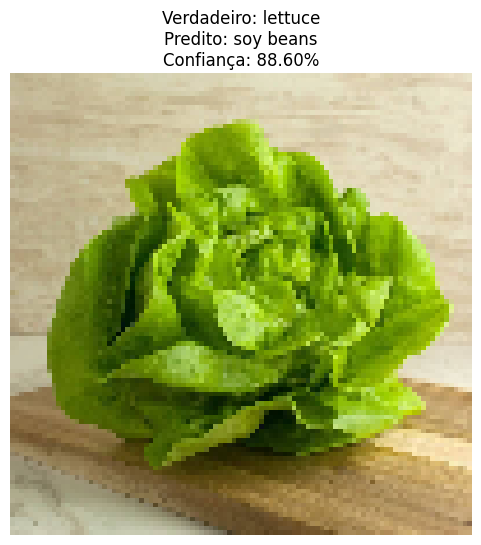

In [88]:
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_fruit_veggie(image_path):
    """
    Carrega e pré-processa a imagem, em seguida utiliza o modelo carregado para predizer a classe.
    Retorna o nome da classe prevista e a confiança da predição.
    """
    # Carregar e pré-processar a imagem
    img = load_img(image_path, target_size=(100, 100))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalização
    
    # Realizar a predição
    prediction = loaded_model.predict(img_array)
    print("Vetor de predição bruto:", prediction)  # Impressão para depuração
    
    # Obter os nomes das classes a partir do diretório de treinamento (assegure-se de que a ordem seja consistente)
    class_names = sorted(os.listdir(os.path.join(extracted_path, "train")))
    
    # Determinar a classe prevista e a confiança
    predicted_class_idx = np.argmax(prediction[0])
    confidence = prediction[0][predicted_class_idx]
    
    return class_names[predicted_class_idx], confidence

# Selecionar um caminho de imagem aleatória do conjunto de teste
test_dir = os.path.join(extracted_path, "test")
if not os.path.exists(test_dir):
    raise ValueError(f"Diretório de teste não encontrado em: {test_dir}")
    
class_folders = [folder for folder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, folder))]
if not class_folders:
    raise ValueError("Nenhuma pasta de classe encontrada no diretório de teste")
    
random_class = random.choice(class_folders)
class_dir = os.path.join(test_dir, random_class)
images_in_class = os.listdir(class_dir)
if not images_in_class:
    raise ValueError(f"Nenhuma imagem encontrada na pasta de classe: {random_class}")
    
random_image = random.choice(images_in_class)
image_path = os.path.join(class_dir, random_image)

# Usar o caminho da imagem para predição
predicted_class, confidence = predict_fruit_veggie(image_path)
print(f"Classe verdadeira: {random_class}")
print(f"Classe prevista: {predicted_class}")
print(f"Confiança: {confidence:.2%}")

# Exibir a imagem com a predição
plt.figure(figsize=(6, 6))
img = load_img(image_path, target_size=(100, 100))
plt.imshow(img)
plt.title(f"Verdadeiro: {random_class}\nPredito: {predicted_class}\nConfiança: {confidence:.2%}")
plt.axis('off')
plt.show()